In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))



['sampleSubmission.csv', 'test1', 'train']


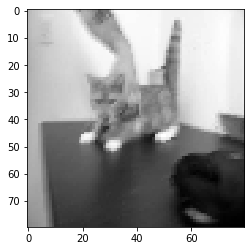

In [8]:
main_dir = "./input/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [9]:
X = [] #이미지에 대한 픽셀정보
y = [] #이미지에 대한 카테고리 정보(고양이, 강아지)
convert = lambda category : int(category == 'dog') #강이지이면 1, 고양이이면 0
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]  # 파일이름에 cat,dog가 있으므로 이것을 통해서 카테고리 분류
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)  #openCV로 이미지를 gray색상으로 가져옴
        new_img_array = cv2.resize(img_array, dsize=(80, 80))  #openCV로 size를 80*80으로 맞춰준다.
        X.append(new_img_array)
        y.append(category)
    

In [10]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1) # Conv2D input_shape파라미터 형식을 맞춰주기 위해서 reshape로 재배치해준다.
y = np.array(y)

In [11]:
X = X/255.0 # gray색상을 하여도 흑백의 밀도가 존재하므로 이것을 최소화 시켜주기 위해서 255로 나누어 주었다 그러면 0~1사이의 값을 갖는다.

In [12]:
model = Sequential()  # sequential model로 정의

model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:])) #64개의 노드를 가지는 Conv2D layer를 추가하고 
# kernel size를 3,3으로 설정, activation(활성화 함수)은 Rectified Linear Unit를 사용하고, input_shape는 위에서 만든 X를 이용
model.add(MaxPooling2D(pool_size = (2,2))) #conV는 항상 max pooling을 하기때문에 size (2,2)로 추가해줌

model.add(Conv2D(64,(3,3), activation = 'relu')) #성능을 위해서 다시 반복해주고 
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten()) #runtime시간을 줄이기 위해서 1차원으로 바꿔줌.
model.add(Dense(64, activation='relu')) #Dense를 사용하여 64개의 노드를 연결시켜주고 Rectified Linear Unit으로 설정, relu는 주로 은닉층에
#사용이 된다.
# => 이러면 성능이 더 좋아진다. 왜냐하면 가중치가 높을수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 적다.
#특징을 이용하기 때문
model.add(Dense(1, activation='sigmoid')) #마지막으로 출력층에는 이진분류 문제(강아지, 고양이)이므로 sigmoid사용하여 Dense를 추가한다.

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
#optimizer, loss, metrics를 설정해주면 모델생성이 완료!
#loss : 현재 가중치 세트를 평가하는 데 사용한 손실 함수이다. 이진 클래스 문제이므로 ‘binary_crossentropy’으로 지정
#optimizer : 최적의 가중치를 검색하는 데 사용되는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 중 하나인 ‘adam’을 사용
#metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 ‘accuracy’으로 지정합니다.

In [13]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 5017s 8s/step - loss: 0.6227 - accuracy: 0.6499 - val_loss: 0.8745 - val_accuracy: 0.5172
Epoch 2/10
625/625 [==============================] - 263s 420ms/step - loss: 0.5482 - accuracy: 0.7372 - val_loss: 0.7531 - val_accuracy: 0.7068
Epoch 3/10
625/625 [==============================] - 318s 509ms/step - loss: 0.4957 - accuracy: 0.7733 - val_loss: 0.9275 - val_accuracy: 0.5720
Epoch 4/10
625/625 [==============================] - 396s 634ms/step - loss: 0.4596 - accuracy: 0.7955 - val_loss: 0.9116 - val_accuracy: 0.5974
Epoch 5/10
625/625 [==============================] - 320s 512ms/step - loss: 0.4289 - accuracy: 0.8130 - val_loss: 0.6394 - val_accuracy: 0.7430
Epoch 6/10
625/625 [==============================] - 309s 494ms/step - loss: 0.3960 - accuracy: 0.8286 - val_loss: 0.6241 - val_accuracy: 0.7682
Epoch 7/10
625/625 [==============================] - 316s 506ms/step - loss: 0.3680 - accuracy: 0.8464 - val_loss: 0.5711 - v

In [14]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#test에서는 id와 판별결과(강아지 : 1 , 고양이 : 0)에 대한 정보가 필요함으로 다음과 같이 배열을 만들어줌
X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255
#create_test1_data는 위에서 만든 create_train과 같은 동작을 수행

In [15]:
predictions = model.predict(X_test) #X_test를 학습시킨 모델을 이용하여 예측을 시도

In [16]:
predicted_val = [int(round(p[0])) for p in predictions] # 예측된 값을 0,1인 binary로 분류하기 때문에 반올림을 해줘야 한다.

In [17]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [19]:
submission_df.to_csv("submission.csv", index=False) #결과를 submission파일에 저장